In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import tensorflow.keras.backend as K
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline

In [3]:
# use linux command to check folders content of unziped data
#!ls flowers
#!rm -Rf data-flower
!dir "flowers/"

 Volume in drive C has no label.
 Volume Serial Number is 9CF8-7C4B

 Directory of C:\Users\Umar\Documents\PIAIC-AI\flowers

21/08/2021  12:16 PM    <DIR>          .
21/08/2021  12:16 PM    <DIR>          ..
21/08/2021  12:14 PM    <DIR>          daisy
21/08/2021  12:15 PM    <DIR>          dandelion
21/08/2021  12:15 PM    <DIR>          rose
21/08/2021  12:16 PM    <DIR>          sunflower
21/08/2021  12:16 PM    <DIR>          tulip
               0 File(s)              0 bytes
               7 Dir(s)  96,109,326,336 bytes free


In [4]:
#installs library to split folders into training, validating and testing
#!pip install split-folders

In [5]:
#import splitfolders
#splitfolders.ratio('flowers', output='data-flower', seed=1337, ratio=(0.8,0.1,0.1))

In [6]:
#Creating Genertor
#importing Data Generator to conver images into tensors (numpy array)
#we are rescaling images as well in the preprocessing phase
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
train_dir = 'output/train'
validation_dir = 'output/val'
test_dir = 'output/test'
batch_size = 20

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100), batch_size=batch_size, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(100,100), batch_size=batch_size, class_mode='categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [8]:
#Model

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [9]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

In [10]:
import matplotlib.pyplot as plt
def accuracy_graph(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [11]:
steps_per_epoch = 3457//batch_size
validation_steps = 430//batch_size 
print(steps_per_epoch, validation_steps)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_steps)

172 21
Epoch 1/40
172/172 [==============================] - 32s 188ms/step - loss: 1.4667 - acc: 0.3354 - val_loss: 1.2705 - val_acc: 0.4476
Epoch 2/40
172/172 [==============================] - 30s 176ms/step - loss: 1.1918 - acc: 0.4924 - val_loss: 1.0695 - val_acc: 0.5619
Epoch 3/40
172/172 [==============================] - 35s 205ms/step - loss: 1.0543 - acc: 0.5807 - val_loss: 0.9446 - val_acc: 0.5786
Epoch 4/40
172/172 [==============================] - 35s 206ms/step - loss: 0.9672 - acc: 0.6093 - val_loss: 0.8759 - val_acc: 0.6095
Epoch 5/40
172/172 [==============================] - 37s 212ms/step - loss: 0.9103 - acc: 0.6463 - val_loss: 0.9067 - val_acc: 0.6190
Epoch 6/40
172/172 [==============================] - 37s 218ms/step - loss: 0.8477 - acc: 0.6815 - val_loss: 0.7987 - val_acc: 0.6810
Epoch 7/40
172/172 [==============================] - 39s 227ms/step - loss: 0.8049 - acc: 0.6920 - val_loss: 0.7919 - val_acc: 0.6619
Epoch 8/40
172/172 [============================

In [14]:
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
flatten
dropout
dense
dense_1


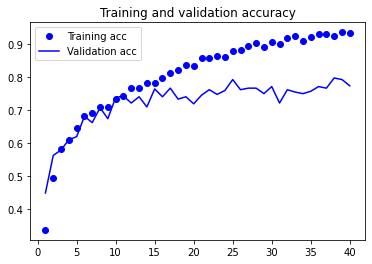

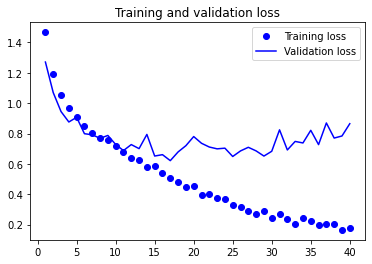

In [15]:
accuracy_graph(history)

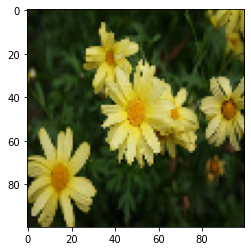

In [16]:
ORIGINAL = 'test.jpg'

DIM = 100

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

imshow(img)

In [17]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [18]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_3')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

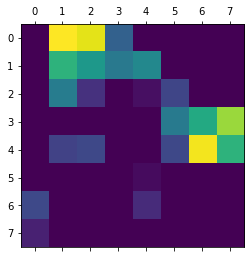

In [19]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

In [20]:
#img = cv2.imread(ORIGINAL)

In [21]:
INTENSITY = 0.5

#heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = cv2.resize(heatmap, (100, 100))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

# heatedimg = (heatmap * INTENSITY) + img
heatedimg = heatmap + img

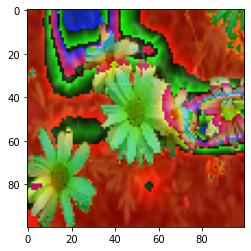

In [22]:
imshow(heatedimg)

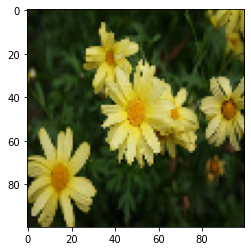

In [23]:
imshow(img)